# Investigations of Heterogeneity with Limit Cycle Parameters

Goes from Limit Cycle Attractor -> Fixed point attractor in homogeneous case.


In [76]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap
from turbo_colormap import *
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd
from pprint import pprint
import re
# RegEx module

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [4]:
# Now Import our data from our data folder:

# Get Scorr csv filenames in a folder
# LCycleCut
Scorr_files = glob.glob("do-not-track/Old/5_8_20/LCycle_*Scorr*.csv")
# LCycleCut - Rot5
#Scorr_files = glob.glob("D:\Simulations\\20_8_9\Rot5_LCycle_*Scorr*.csv")
# FixedPt
#Scorr_files = glob.glob("D:\Simulations\\2020_08_12\FixedPt_*Scorr*.csv")
# Hysteresis
#Scorr_files = glob.glob("D:\Simulations\\2020_08_12\Hysteresis_*Scorr*.csv")
# ReverseFixedPt
#Scorr_files = glob.glob("D:\Simulations\\2020_08_13\FixedPt_*Scorr*.csv")
# ReverseHysteresis
#Scorr_files = glob.glob("D:\Simulations\\2020_08_13\Hysteresis_*Scorr*.csv")
# ShorterLCycleCut = 1.2e4
#Scorr_files = glob.glob("D:\Simulations\\2020_08_14\Correct_Shorter_LCycle_*Scorr*.csv")
# ShortestLCycleCut = 1.2e3
#Scorr_files = glob.glob("D:\Simulations\\2020_08_14\Correct_Shortest_*Scorr*.csv")
# Hysteresis Better
#Scorr_files = glob.glob("D:\Simulations\\2020_08_21\Hysteresis_*Scorr*.csv")


# The last number is of hrs_mins_secs HHMMSS

print(Scorr_files)

['do-not-track/Old/5_8_20\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-024120_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-025224_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-030331_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-031446_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.05]_MouseCortex_Scorr_20200805-032552_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.05]_MouseCortex_Scorr_20200806-114920_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-024114_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-025225_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-030333_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-031441_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200805-032550_.csv', 'do-not-track/Old/5_8_20\\LCycle_G[0.15]_MouseCortex_Scorr_20200806-114904_.csv', 'do-not-track/O

In [5]:
# Okay, so we see that it's properly ordered by time (which is also the ordering for sigma) after the G value.  The issue is that G values are not sequential
# First of all, let's take every 6th filename (which corresponds to simulations with equal sigma)
# For S0,S1...S4,S5
Files_S0 = Scorr_files[0::6]
Files_S1 = Scorr_files[1::6]
Files_S2 = Scorr_files[2::6]
Files_S3 = Scorr_files[3::6]
Files_S4 = Scorr_files[4::6]
Files_S5 = Scorr_files[5::6]

S0 = SCFC_sort(Files_S0)
S1 = SCFC_sort(Files_S1)
S2 = SCFC_sort(Files_S2)
S3 = SCFC_sort(Files_S3)
S4 = SCFC_sort(Files_S4)
S5 = SCFC_sort(Files_S5)

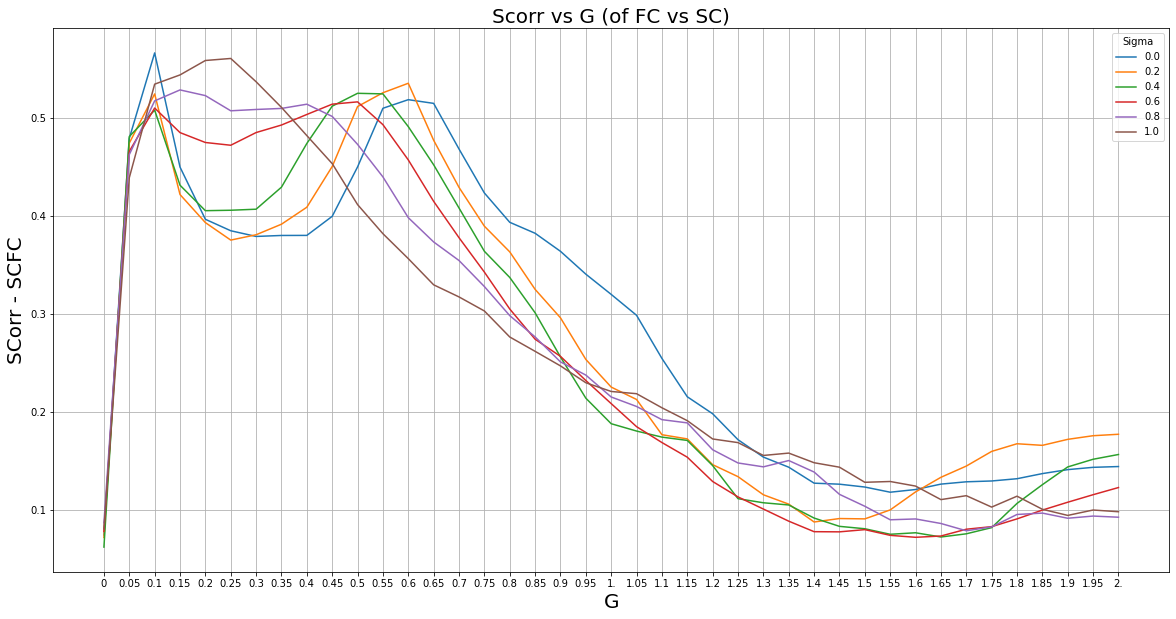

In [6]:
# Graph it: 
plt.plot(S0[0],S0[1])
plt.plot(S1[0],S1[1])
plt.plot(S2[0],S2[1])
plt.plot(S3[0],S3[1])
plt.plot(S4[0],S4[1])
plt.plot(S5[0],S5[1])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - SCFC', fontsize=20)
plt.title('Scorr vs G (of FC vs SC)', fontsize=20)
plt.grid()
plt.legend(('0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()

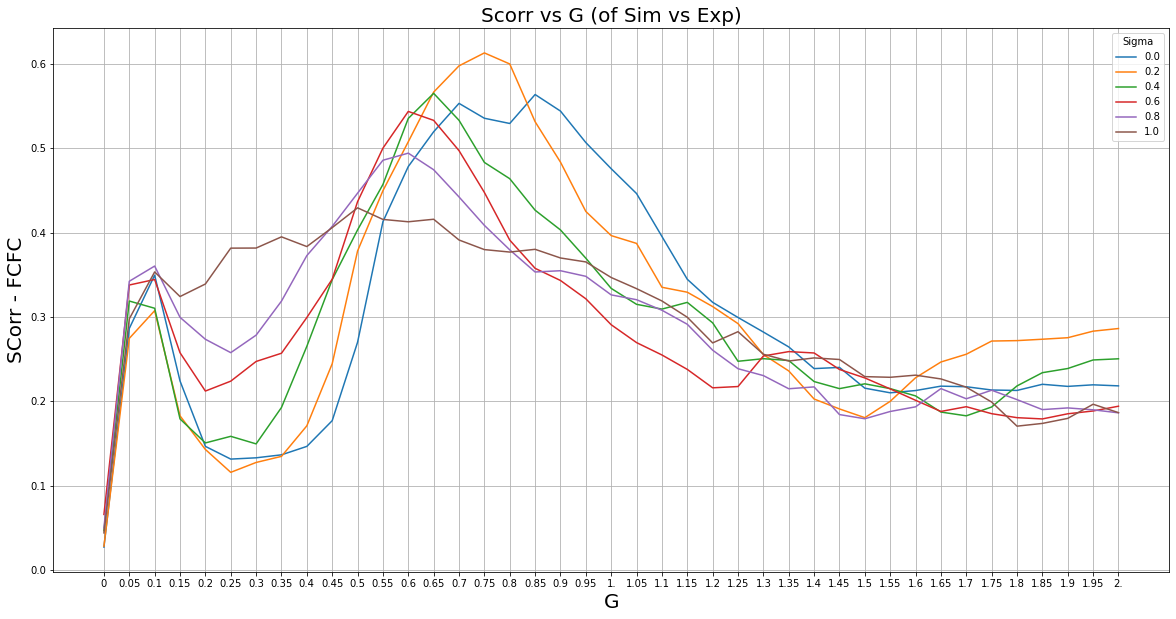

In [7]:
# Graph it: 
plt.plot(S0[0],S0[2])
plt.plot(S1[0],S1[2])
plt.plot(S2[0],S2[2])
plt.plot(S3[0],S3[2])
plt.plot(S4[0],S4[2])
plt.plot(S5[0],S5[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('Scorr vs G (of Sim vs Exp)', fontsize=20)
plt.grid()
plt.legend(('0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


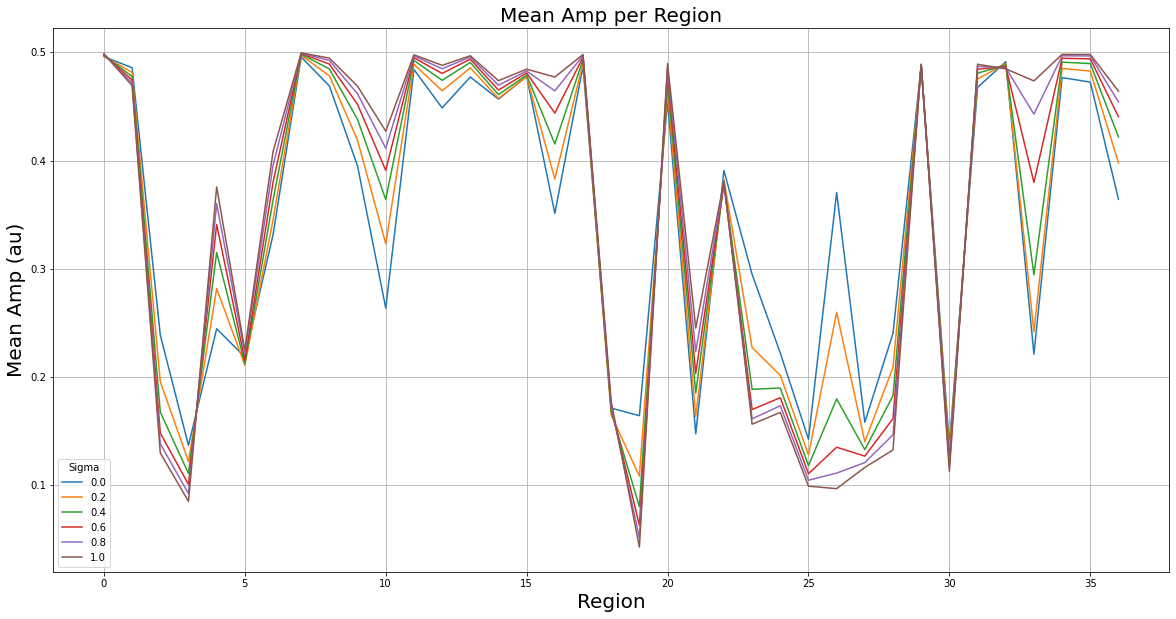

In [8]:
# Peaks is at: do-not-track\\LCycle_G[0.75]_MouseCortex_Scorr_20200805-031253_.csv

TFiles = glob.glob("do-not-track/Old/5_8_20/LCycle_G[0.75*Tseries*_.csv")

for item in TFiles:
    df = np.genfromtxt(item,delimiter="\t")
    bold_time = df[0]
    bold_data = df[1:]
    XX = list(map(np.median,bold_data))

    plt.plot(XX)

plt.grid()
plt.xlabel('Region', fontsize=20)
plt.ylabel('Mean Amp (au)', fontsize=20)
plt.title('Mean Amp per Region', fontsize=20)
plt.legend(("0.0","0.2","0.4","0.6","0.8","1.0"),title="Sigma")

# 2nd Order Het


In [9]:
# Now Import our data from our data folder:

# Get Scorr csv filenames in a folder
# LCycleCut 2nd Order
Scorr_files = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.0*Scorr*.csv")

# The last number is of hrs_mins_secs HHMMSS

print(Scorr_files)

['D:\\Simulations\\2020_09_10\\LCycleCut_G[0.05]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-210045_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.15]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-205830_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.1]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-205858_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.25]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-210129_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.2]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-210057_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.35]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-205930_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.3]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-210134_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.45]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-210019_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.4]sig_e0.0sig_i0.0_MouseCortex_Scorr_20200907-205909_.csv', 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.55]sig_e0.0sig

In [10]:
# Naming sense:
# 0 = 0 , 1 = 0.2, 2 = 0.4... 5 = 1
# 1st digit corresonds to sig_e, 2nd digit corresponds to sig_i

Files_S00 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.0*Scorr*.csv")
Files_S01 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.2*Scorr*.csv")
Files_S02 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.4*Scorr*.csv")
Files_S03 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.6*Scorr*.csv")
Files_S04 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i0.8*Scorr*.csv")
Files_S05 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.0sig_i1.0*Scorr*.csv")

Files_S10 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i0.0*Scorr*.csv")
Files_S11 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i0.2*Scorr*.csv")
Files_S12 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i0.4*Scorr*.csv")
Files_S13 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i0.6*Scorr*.csv")
Files_S14 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i0.8*Scorr*.csv")
Files_S15 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.2sig_i1.0*Scorr*.csv")

Files_S20 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i0.0*Scorr*.csv")
Files_S21 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i0.2*Scorr*.csv")
Files_S22 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i0.4*Scorr*.csv")
Files_S23 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i0.6*Scorr*.csv")
Files_S24 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i0.8*Scorr*.csv")
Files_S25 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.4sig_i1.0*Scorr*.csv")

Files_S30 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i0.0*Scorr*.csv")
Files_S31 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i0.2*Scorr*.csv")
Files_S32 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i0.4*Scorr*.csv")
Files_S33 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i0.6*Scorr*.csv")
Files_S34 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i0.8*Scorr*.csv")
Files_S35 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.6*sig_i1.0*Scorr*.csv")

Files_S40 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i0.0*Scorr*.csv")
Files_S41 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i0.2*Scorr*.csv")
Files_S42 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i0.4*Scorr*.csv")
Files_S43 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i0.6*Scorr*.csv")
Files_S44 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i0.8*Scorr*.csv")
Files_S45 = glob.glob("D:\Simulations\\2020_09_10\*sig_e0.8sig_i1.0*Scorr*.csv")

Files_S50 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i0.0*Scorr*.csv")
Files_S51 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i0.2*Scorr*.csv")
Files_S52 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i0.4*Scorr*.csv")
Files_S53 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i0.6*Scorr*.csv")
Files_S54 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i0.8*Scorr*.csv")
Files_S55 = glob.glob("D:\Simulations\\2020_09_10\*sig_e1.0sig_i1.0*Scorr*.csv")

S00 = SCFC_sort(Files_S00)
S01 = SCFC_sort(Files_S01)
S02 = SCFC_sort(Files_S02)
S03 = SCFC_sort(Files_S03)
S04 = SCFC_sort(Files_S04)
S05 = SCFC_sort(Files_S05)

S10 = SCFC_sort(Files_S10)
S11 = SCFC_sort(Files_S11)
S12 = SCFC_sort(Files_S12)
S13 = SCFC_sort(Files_S13)
S14 = SCFC_sort(Files_S14)
S15 = SCFC_sort(Files_S15)

S20 = SCFC_sort(Files_S20)
S21 = SCFC_sort(Files_S21)
S22 = SCFC_sort(Files_S22)
S23 = SCFC_sort(Files_S23)
S24 = SCFC_sort(Files_S24)
S25 = SCFC_sort(Files_S25)

S30 = SCFC_sort(Files_S30)
S31 = SCFC_sort(Files_S31)
S32 = SCFC_sort(Files_S32)
S33 = SCFC_sort(Files_S33)
S34 = SCFC_sort(Files_S34)
S35 = SCFC_sort(Files_S35)

S40 = SCFC_sort(Files_S40)
S41 = SCFC_sort(Files_S41)
S42 = SCFC_sort(Files_S42)
S43 = SCFC_sort(Files_S43)
S44 = SCFC_sort(Files_S44)
S45 = SCFC_sort(Files_S45)

S50 = SCFC_sort(Files_S50)
S51 = SCFC_sort(Files_S51)
S52 = SCFC_sort(Files_S52)
S53 = SCFC_sort(Files_S53)
S54 = SCFC_sort(Files_S54)
S55 = SCFC_sort(Files_S55)

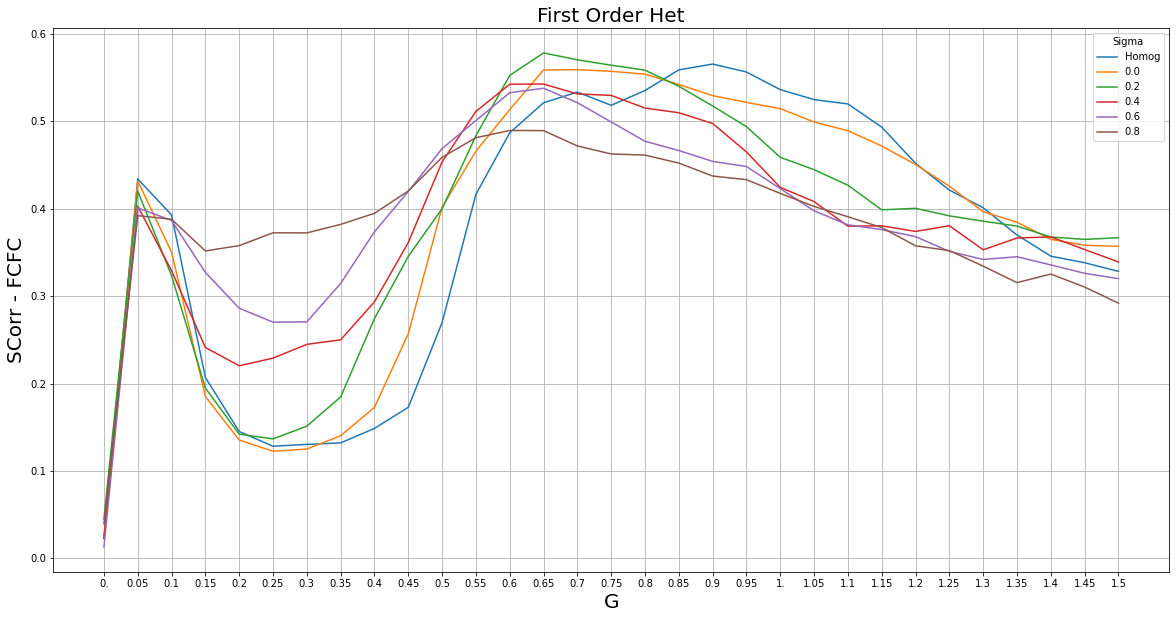

In [11]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S11[0],S11[2])
plt.plot(S22[0],S22[2])
plt.plot(S33[0],S33[2])
plt.plot(S44[0],S44[2])
plt.plot(S55[0],S55[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('First Order Het', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


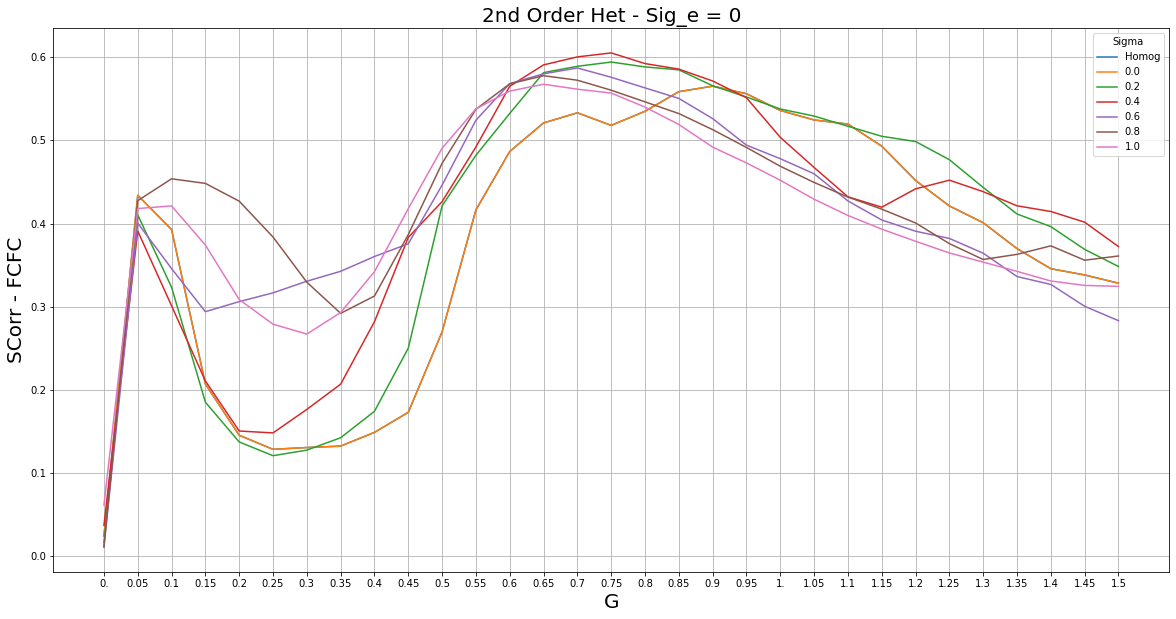

In [12]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S00[0],S00[2])
plt.plot(S01[0],S01[2])
plt.plot(S02[0],S02[2])
plt.plot(S03[0],S03[2])
plt.plot(S04[0],S04[2])
plt.plot(S05[0],S05[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 0', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()
# Sige = 0


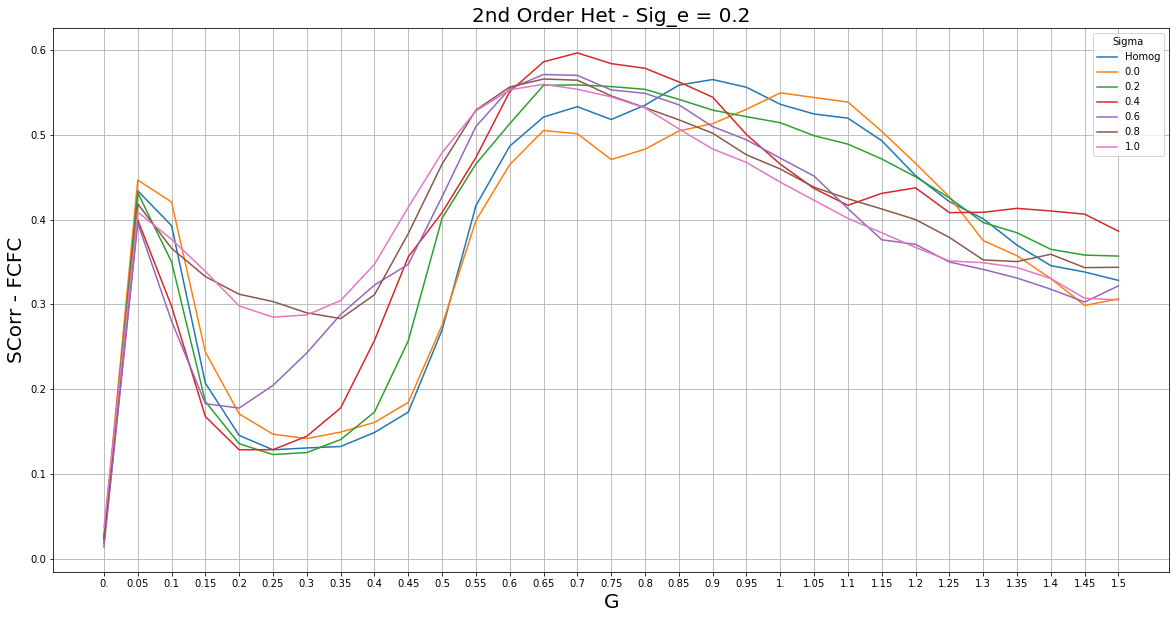

In [13]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S10[0],S10[2])
plt.plot(S11[0],S11[2])
plt.plot(S12[0],S12[2])
plt.plot(S13[0],S13[2])
plt.plot(S14[0],S14[2])
plt.plot(S15[0],S15[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 0.2', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


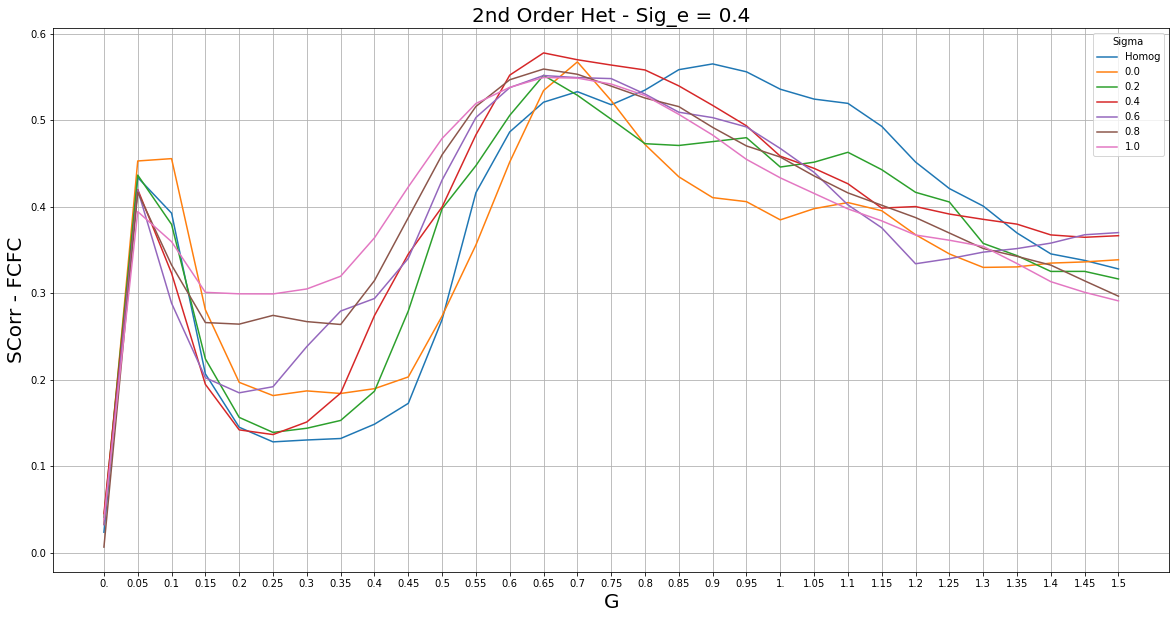

In [14]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S20[0],S20[2])
plt.plot(S21[0],S21[2])
plt.plot(S22[0],S22[2])
plt.plot(S23[0],S23[2])
plt.plot(S24[0],S24[2])
plt.plot(S25[0],S25[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 0.4', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


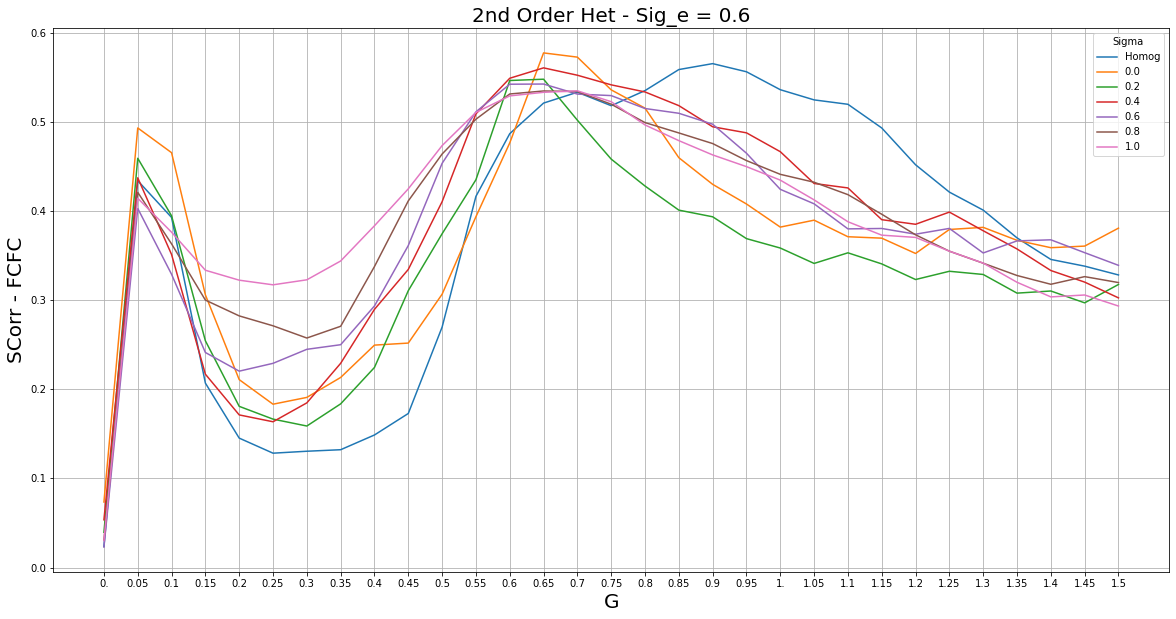

In [15]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S30[0],S30[2])
plt.plot(S31[0],S31[2])
plt.plot(S32[0],S32[2])
plt.plot(S33[0],S33[2])
plt.plot(S34[0],S34[2])
plt.plot(S35[0],S35[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 0.6', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


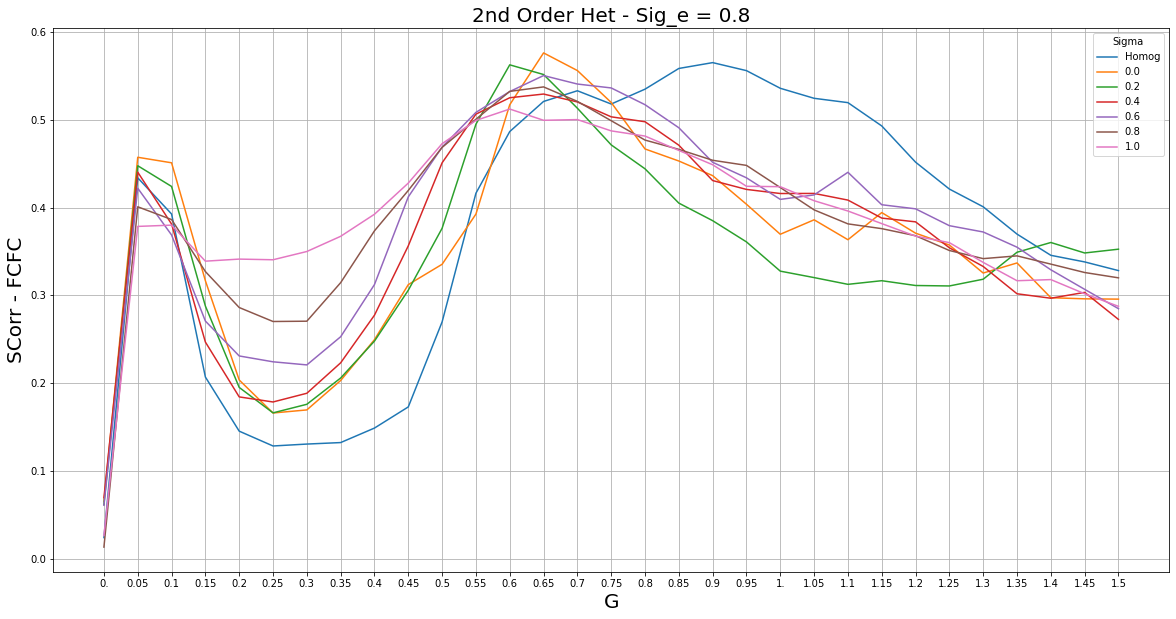

In [16]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S40[0],S40[2])
plt.plot(S41[0],S41[2])
plt.plot(S42[0],S42[2])
plt.plot(S43[0],S43[2])
plt.plot(S44[0],S44[2])
plt.plot(S45[0],S45[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 0.8', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


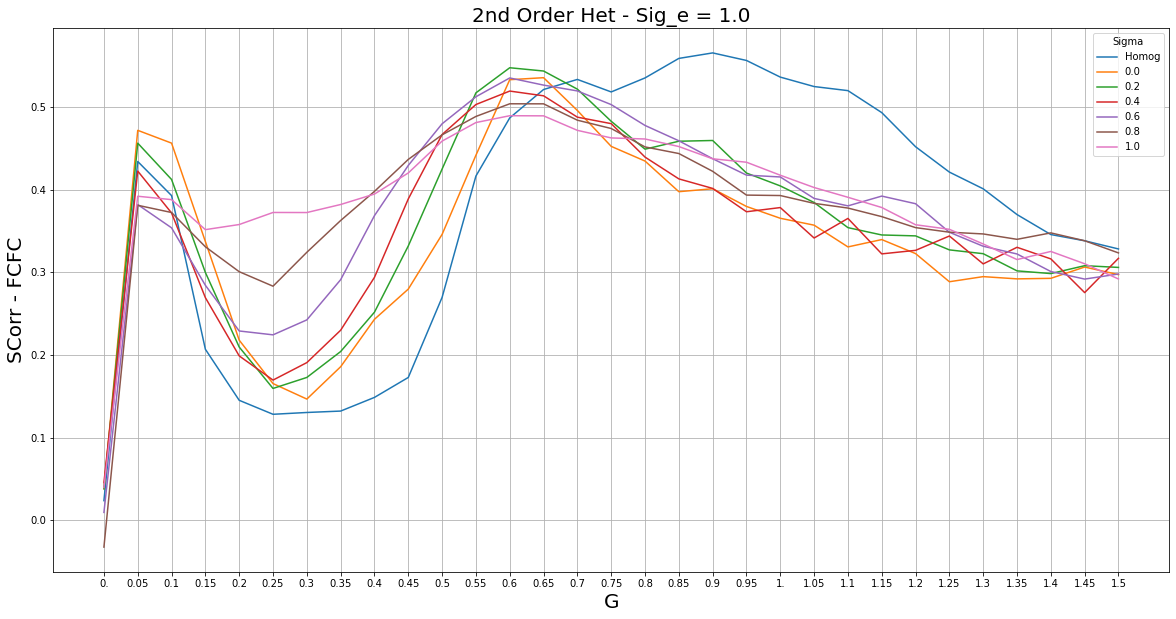

In [17]:
# Graph it: 
plt.plot(S00[0],S00[2])
plt.plot(S50[0],S50[2])
plt.plot(S51[0],S51[2])
plt.plot(S52[0],S52[2])
plt.plot(S53[0],S53[2])
plt.plot(S54[0],S54[2])
plt.plot(S55[0],S55[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('2nd Order Het - Sig_e = 1.0', fontsize=20)
plt.grid()
plt.legend(('Homog','0.0','0.2','0.4','0.6','0.8','1.0'),title="Sigma")
plt.show()


# Sweep of $G$ and $B_e$ for Homog

In [115]:
# SCorr_files = glob.glob(r"D:\Simulations\2020_09_18\*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\LCycle*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\FixedPt*Scorr*.csv")
#SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\Hysteresis*Scorr*.csv")

Regime = "LCycle"
SCorr_files = glob.glob(r"D:\Simulations\2020_09_23\\" + Regime +"*Scorr*.csv") # LCycle
#SCorr_files = glob.glob(r"D:\Simulations\2020_10_05\\" + Regime +"*Scorr*.csv") # FixedPt
#SCorr_files = glob.glob(r"D:\Simulations\2020_10_06\\" + Regime +"*Scorr*.csv") # Hysteresis 
#SCorr_files = glob.glob(r"D:\Simulations\2020_11_10\\" + Regime +"*Scorr*.csv") # L Hysteresis 11_10 is faulty, use... 
#SCorr_files = glob.glob(r"D:\Simulations\2020_11_13\\" + Regime +"*Scorr*.csv")

In [116]:
Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    x = re.findall("\[(.*)\].*\[(.*)\]",string)
    #x = re.findall("\[(.*)\].b_e(...)",string)
    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df = pd.DataFrame(Params)
df.columns = ['G', 'B_e']
df["SCFC"] = SCFC
df["FCFC"] = FCFC

In [117]:
df = df.sort_values(by=["FCFC"])
df

,G,B_e,SCFC,FCFC
591,0.,0.3,0.021555,-0.023584
590,0.,0.2,0.016703,-0.020834
595,0.,0.7,0.019055,-0.020654
589,0.,0.1,0.018332,-0.016618
592,0.,0.4,0.033259,-0.016037
...,...,...,...,...
253,0.4,0.6,0.535804,0.574213
254,0.4,0.7,0.551833,0.575119
224,0.45,0.8,0.525897,0.575623
351,0.65,1.1,0.426993,0.576720


In [118]:
df.tail(20)

,G,B_e,SCFC,FCFC
383,0.6,1.2,0.477783,0.563545
479,0.85,1.5,0.382786,0.563658
391,0.6,1.,0.440250,0.564220
189,0.3,0.4,0.579461,0.564326
318,0.5,0.9,0.497494,0.564438
286,0.55,0.8,0.448868,0.565797
252,0.4,0.5,0.519618,0.565898
222,0.45,0.6,0.495465,0.566478
289,0.55,1.1,0.500049,0.566548
159,0.35,0.5,0.558475,0.568002


Text(0.5, 1.0, 'FCFC against B_e sweeping G')

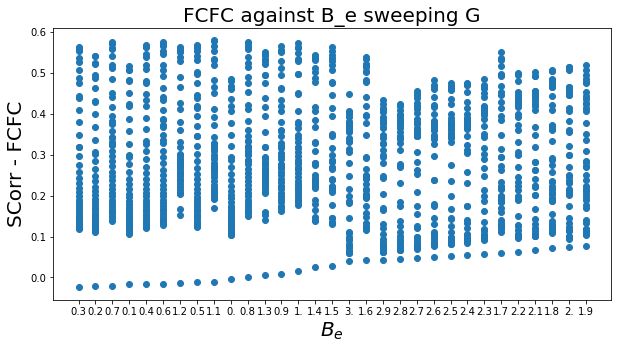

In [119]:
plt.scatter(df.B_e,df.FCFC)
plt.xlabel("$B_e$", fontsize=20)
plt.ylabel("SCorr - FCFC", fontsize=20)
plt.title("FCFC against B_e sweeping G", fontsize=20)

In [120]:
df.loc[df['FCFC'].idxmax()]

G            0.6
B_e          1.1
SCFC    0.459622
FCFC    0.580152
Name: 382, dtype: object

Text(0.5, 1.0, 'B_e = 1.1')

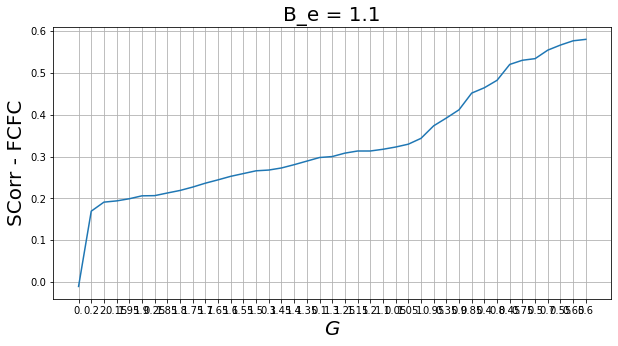

In [121]:
df_08 = df.loc[df['B_e'] == df.loc[df['FCFC'].idxmax()][1]]
plt.plot(df_08.G,df_08.FCFC)
plt.xlabel("$G$", fontsize=20)
plt.ylabel("SCorr - FCFC", fontsize=20)
plt.grid()
plt.title("B_e = "+ str(df.loc[df['FCFC'].idxmax()][1]), fontsize=20)

Text(0.5, 1.0, 'B_e = 4.')

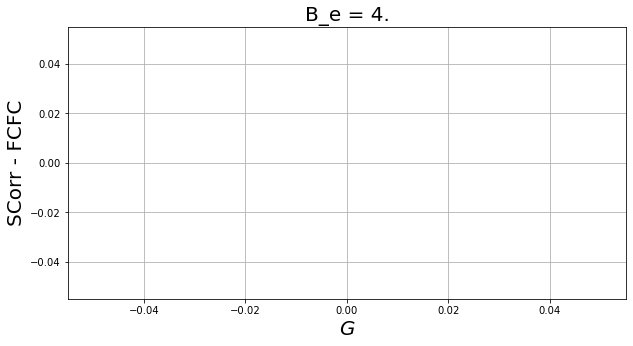

In [122]:
df_08 = df.loc[df['B_e'] == "4."]
plt.plot(df_08.G,df_08.FCFC)
plt.xlabel("$G$", fontsize=20)
plt.ylabel("SCorr - FCFC", fontsize=20)
plt.grid()
plt.title("B_e = 4.", fontsize=20)

Text(0.5, 1.0, 'G = 0.6')

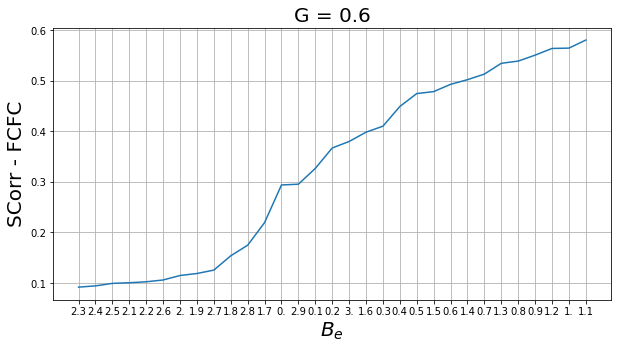

In [123]:
df_G = df.loc[df['G'] == df.loc[df['FCFC'].idxmax()][0]]
plt.plot(df_G.B_e,df_G.FCFC)
plt.xlabel("$B_e$", fontsize=20)
plt.ylabel("SCorr - FCFC", fontsize=20)
plt.grid()
plt.title("G = " + str(df.loc[df['FCFC'].idxmax()][0]), fontsize=20)

In [124]:
df_pivot = df.sort_values('FCFC').drop_duplicates(['G','B_e'],keep='last').pivot(index='B_e', columns='G', values='FCFC')
df_pivot
# Reason why we need to do this is because the clsuter did something bad and simulated a few points multiple times (this is likely from it deciding to stop runs midway and then restarting)

G,0.,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,...,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2.
B_e,,,,,,,,,,,,,,,,,,,,,
0.,-0.003621,0.286519,0.418203,0.468389,0.485016,0.480670,0.460380,0.435624,0.407740,0.378623,...,0.127998,0.125282,0.122635,0.119584,0.116699,0.113378,0.110616,0.107707,0.104913,0.103635
0.1,-0.016618,0.295050,0.424466,0.481460,0.508110,0.516278,0.506154,0.479401,0.449623,0.418982,...,0.132961,0.130373,0.127186,0.124735,0.121450,0.118222,0.116012,0.113192,0.110310,0.107461
0.2,-0.020834,0.302837,0.429941,0.487805,0.522101,0.540591,0.541859,0.524258,0.495537,0.462962,...,0.138541,0.135480,0.132080,0.128899,0.126255,0.123491,0.120771,0.117922,0.115063,0.112040
0.3,-0.023584,0.318315,0.437531,0.486864,0.525521,0.552660,0.563358,0.557853,0.537217,0.508194,...,0.144956,0.140847,0.137275,0.133419,0.129657,0.127283,0.124698,0.122068,0.119872,0.117633
0.4,-0.016037,0.327160,0.434736,0.475720,0.519063,0.545177,0.564326,0.569123,0.561984,0.538901,...,0.155121,0.149821,0.144066,0.138436,0.134271,0.130905,0.127434,0.125393,0.122411,0.120562
0.5,-0.010862,0.346406,0.414948,0.439655,0.497614,0.540329,0.560298,0.568002,0.565898,0.552636,...,0.166655,0.161571,0.155202,0.149060,0.144281,0.139106,0.134193,0.129112,0.125536,0.122418
0.6,-0.015025,0.335636,0.372892,0.383954,0.439920,0.507899,0.552439,0.570950,0.574213,0.566478,...,0.180943,0.173837,0.167387,0.162231,0.155749,0.148881,0.144018,0.138559,0.133873,0.129063
0.7,-0.020654,0.331439,0.342846,0.324818,0.382771,0.441838,0.518838,0.558131,0.575119,0.570303,...,0.198129,0.189665,0.181616,0.174370,0.167157,0.161599,0.157013,0.150919,0.144944,0.138589
0.8,0.000350,0.315868,0.300804,0.285826,0.334334,0.422008,0.475829,0.523257,0.559140,0.575623,...,0.216131,0.207225,0.198257,0.190029,0.181725,0.174404,0.168263,0.161922,0.156366,0.151408


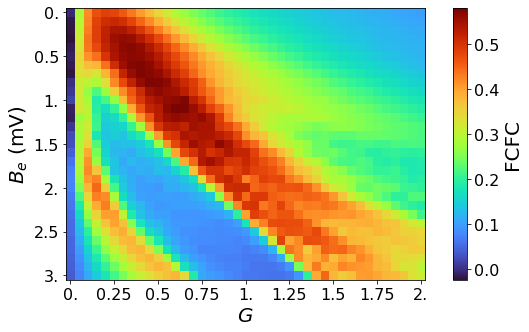

In [126]:
#ListedColormap(turbo_colormap_data) ,vmin=0,vmax=0.65
cs=plt.imshow(df_pivot, cmap=ListedColormap(turbo_colormap_data), aspect='equal', interpolation='none')
#plt.title(Regime + ' Regime - FCFC', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('FCFC', fontsize=20)
axcb.ax.tick_params(labelsize=16)
plt.yticks(ticks=np.arange(len(df_pivot.index))[::5],labels=df_pivot.index[::5],fontsize=16)
plt.xticks(ticks=np.arange(len(df_pivot.columns))[::5],labels=df_pivot.columns[::5],fontsize=16)
plt.xlabel("$G$", fontsize=20)
plt.ylabel("$B_e$ (mV)", fontsize=20)
plt.savefig("do-not-track\\" + Regime +"_sweep.pdf",bbox_inches='tight')
plt.show()